In [101]:
from csoundengine import OfflineEngine
e = OfflineEngine()

--Csound version 7.0 (double samples) Feb 14 2025
[commit: f0bf77568df31b2ade4fe7fce654a5e6af5e8e45]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-49um277v.wav (WAV)
SECTION 1:


In [102]:
e.compile(r'''
instr pitchtrack
  itabnum = p4   ; the sound source
  itabfreq = p5  ; the table where to put tracked pitch. The table must be big enough
  itabsize = ftlen(itabfreq)
  ifftsize = 2048
  ifftsize2 = ifftsize * 2  ; this second anaylsis helps smooth the result
  iwtype = 0        ; hamming
  kcount init 1     ; the first element is the element count
  ksource = 1
  aouts[] loscilx 1, 1, itabnum, 4, 1
  a0 = aouts[0]     ; only analyze first channel
  iwinfactor = 0.68
  ihop = ifftsize / 4
  kfreqprev init 0
  kfreq init 0
  a0d = delay(a0, ifftsize2*iwinfactor / sr)  ; shift the original signal
  fsig  pvsanal a0d, ifftsize, ihop, ifftsize * iwinfactor, iwtype
  fsig2 pvsanal a0, ifftsize2, ihop, ifftsize2 * iwinfactor, iwtype
  kfreq1, kamp pvspitch fsig, 0.06
  kfreq2, kamp2 pvspitch fsig2, 0.1
  kt = timeinsts()
  if kcount >= itabsize || detectsilence(a0, db(-90), 0.1) == 1 then
    turnoff
  endif
  iminfreq = 60
  imaxfreq = 400
  kvalid1 = kfreq1 > iminfreq && kfreq1 < imaxfreq ? 1 : 0
  kvalid2 = kfreq2 > iminfreq && kfreq2 < imaxfreq ? 1 : 0
  if kvalid1 == 0 && kvalid2 == 0 then
      kfreq1 = 0
  elseif kvalid1 == 0 && kvalid2 == 1 then
      println "----- 2: B, %f, 1=%d, 2=%d", kt, kfreq1, kfreq2
      ksource = 2
  elseif kvalid1 == 1 && kvalid2 == 1 then
      if kfreq1 / kfreq2 > 1.5 then
          println "::::: 2: D, %f, 1=%d, 2=%d", kt, kfreq1, kfreq2
          ksource = 2
      endif
  endif
  kfreq0 = ksource == 1 ? kfreq1 : kfreq2
  kfreq = kfreq0 > 0 ? kfreq0 : kfreq
  kfreqprev = kfreq0
  tabw kfreq, kcount, itabfreq
  kcount += 1
  tabw kcount, 0, itabfreq
  ; To validate the analysis, we output the original sound and the resynthesized audio
  agate = lagud:a(interp(kfreq0 > 0 ? 1 : 0), 0.01, 0.03)
  aenv = follow2:a(a0, 0.025, 0.05)
  outs a0d, buzz(aenv * agate, kfreq, 7, -1)
endin
''')

# sndtab = e.readSoundfile("/home/em/Lib/snd/samples/test/piano-pitchtest-2.flac")


In [103]:
sndtab = e.readSoundfile("/home/em/Lib/snd/samples/speech/voiceover-fragment.flac")
sndtabinfo = e.tableInfo(sndtab)
duration = sndtabinfo.duration
numcycles = int(duration * e.sr / e.ksmps)
freqtab = e.makeEmptyTable(numcycles + 100)
e.sched('pitchtrack', 0, duration + 0.1, sndtab, freqtab)
e.perform()
# Now retrieve information
# outarr = e.getTableData(freqtab)
# datalen = int(outarr[0])
# freqs = outarr[1:1+datalen]
# print(freqs)
# Finished with the engine, stop it so that we can access the generated soundfile
# for validation. This is just to show that the output file is only fully formed
# after the engine is stopped
renderjob = e.stop()

# Open the outfile in the default application
#renderjob.openOutfile()
renderjob.openOutfile(app='ocenaudio', appwait=False)

----- 2: B, 0.059501, 1=0, 2=117
----- 2: B, 0.060952, 1=0, 2=117
----- 2: B, 0.062404, 1=0, 2=117
----- 2: B, 0.063855, 1=0, 2=117
----- 2: B, 0.065306, 1=0, 2=117
----- 2: B, 0.066757, 1=0, 2=117
----- 2: B, 0.068209, 1=0, 2=117
----- 2: B, 0.069660, 1=0, 2=117
----- 2: B, 0.071111, 1=0, 2=118
----- 2: B, 0.072562, 1=0, 2=118
----- 2: B, 0.074014, 1=0, 2=118
----- 2: B, 0.075465, 1=0, 2=118
----- 2: B, 0.076916, 1=0, 2=118
----- 2: B, 0.078367, 1=0, 2=118
----- 2: B, 0.079819, 1=0, 2=118
----- 2: B, 0.081270, 1=0, 2=118
----- 2: B, 0.082721, 1=0, 2=119
----- 2: B, 0.084172, 1=0, 2=119
----- 2: B, 0.085624, 1=0, 2=119
----- 2: B, 0.087075, 1=0, 2=119
----- 2: B, 0.088526, 1=0, 2=119
----- 2: B, 0.089977, 1=0, 2=119
----- 2: B, 0.091429, 1=0, 2=119
----- 2: B, 0.092880, 1=0, 2=119
::::: 2: D, 0.129161, 1=124, 2=69
::::: 2: D, 0.130612, 1=124, 2=69
::::: 2: D, 0.132063, 1=124, 2=69
::::: 2: D, 0.133515, 1=124, 2=69
::::: 2: D, 0.134966, 1=124, 2=69
::::: 2: D, 0.136417, 1=124, 2=69
::::

RenderJob(outfile='/tmp/csoundengine-mnzmpbnw.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
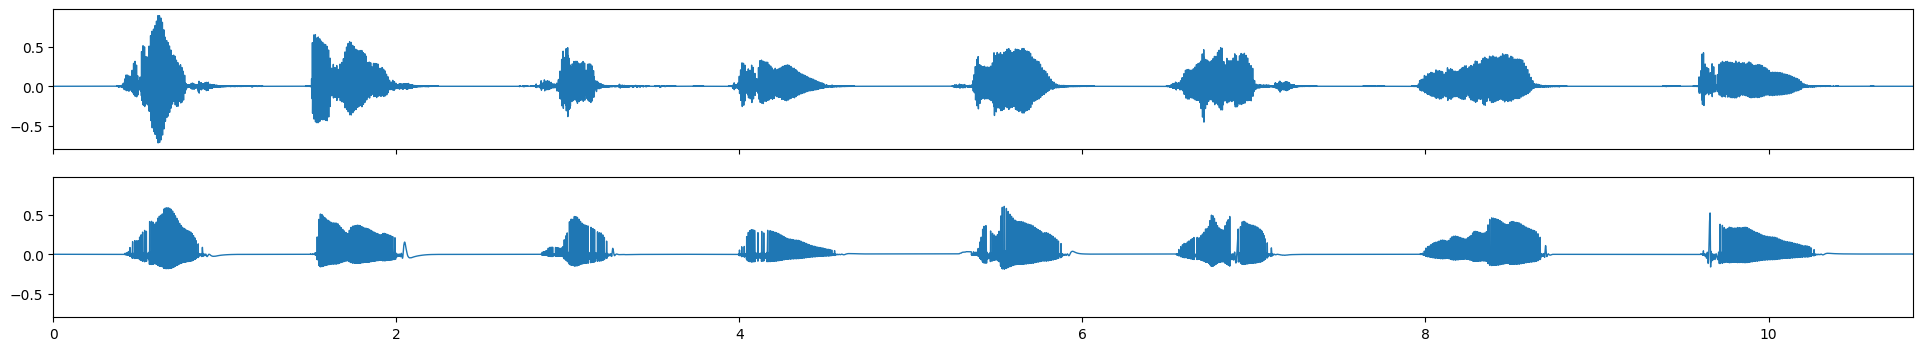

In [111]:
renderjob

In [9]:
renderjob.outfile

'/tmp/csoundengine-nkxyq9u0.wav'